# 언제 버스를 추가해야 효율적으로 지하철 인원을 분산시킬 수 있을까?

## 목차
+ 데이터 전처리 
+ 지하철 역별 하차인원 데이터 시각화
+ 시간대별 지하철 승하차 인원 추이시각화
+ 서울시 버스 노선별 승하차인원 시각화
+ 결론
+ 제안

## 주제와 주제선정 이유
경기도에 거주하는 제가 서울까지 쉽게 가는 방법은 지하철을 이용하는 것입니다. 지하철역 근처에는 버스정류장과 같은 다른 교통수단 정거장이 있는 경우가 많아서 환승도 쉽게 할 수 있기 때문입니다. 그러한 편의성에 의해 많은 사람들이 지하철을 이용하게 되는데, 요즘과 같은 코로나 시국에 이러한 지하철의 장점은 오히려 독이 될 수도 있다고 생각하였습니다. 그래서 지하철을 이용하는 인원들에 대한 집중을 파악하면 사회적 거리두기를 비롯한 다양한 분야에 도움이 되는 데이터를 접할 수 있지 않을까라는 생각에 지하철을 주제로 선정하게 되었습니다.

## 분석을 통해 알고자 하는 것과 하고자 하는 것
 지하철을 이용하는 인원은 항상 일정하지 않습니다. 일명 ‘지옥철’이라는 말이 있듯이 특정 시간, 특정 요일에 그리고 특정 역에 집중되는 것은 누구나가 체감한 통념입니다. 저는 이런 통념을 구체적인 수치로 파악함으로써 특정 시간, 특정 역에 이용자가 집중된다는 것을 증명하고 이를 토대로 집중되는 요일, 시간, 역을 알고자 합니다. 그리고 그것을 바탕으로 효율적인 사회적 거리두기를 실행 할 수 있는 방법들을 제안하고자 합니다.

## 데이터
+ 서울시 열린데이터 광장 공공 데이터
    + [서울시 버스 노선별 사용 인원 현황 csv파일 ] :  
    (http://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do#)<p/>
    + [서울시 지하철 이용 현황 API] :   
    (http://openapi.seoul.go.kr:8088/{apikey}/json/CardSubwayStatsNew/1/1000/{date})<p/> 
    + [서울시 지하철 시간대별 승하차인원 API] :   
      (http://openapi.seoul.go.kr:8088/{apikey}/JSON/CardSubwayTime/1/1000/{date}/)  <p/> 
    + [서울시 버스 노선별 좌표 정보] :   
      (http://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do)<p/>  
<br/>

+ 외부 데이터
    + [서울시 지하철 역 좌표 정보] :   
      (https://observablehq.com/@taekie/seoul_subway_station_coordinate)
          

## 데이터 전처리  
### 서울시 지하철 이용 현황 API 전처리
api를 반복문을 이용하여 필요한 기간까지의 데이터를 불러옵니다. 용량이 너무 큰 관계로 필요한 처리를 완료한 다음 excel파일로 저장하여 불러오도록 했습니다. 우선 521개의 서울시 지하철 역중 하차인원이 1000만명 이상인 역들을 조사 대상으로 추려서 분석을 하기로 하였습니다. 하차인원이 1000만명 이상인 역들의 하차인원, 승차인원, 호선, 지하철 역, 사용일자 요일 칼럼을 추출민 생성하여 전처리 하였습니다. 데이터는 가공하기 유용하도록 json형태로 가지고 왔습니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 
import requests

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

In [2]:
apikey='56616c4a59616c7336316272565241'

http://openapi.seoul.go.kr:8088/(인증키)/json/CardSubwayStatsNew/시작/끝/(날짜)

In [3]:
date= 20210101
url1 = f'http://openapi.seoul.go.kr:8088/{apikey}/json/CardSubwayStatsNew/1/1000/{date}'
url1

'http://openapi.seoul.go.kr:8088/56616c4a59616c7336316272565241/json/CardSubwayStatsNew/1/1000/20210101'

In [4]:
start = '20210101'
end = '20210808'

pd.date_range(start, end)


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-07-30', '2021-07-31', '2021-08-01', '2021-08-02',
               '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
               '2021-08-07', '2021-08-08'],
              dtype='datetime64[ns]', length=220, freq='D')

In [5]:
result_list=[]
for i in pd.date_range(start, end):
    date = str(i)[:10].replace('-','')
    url1 = f'http://openapi.seoul.go.kr:8088/{apikey}/json/CardSubwayStatsNew/1/1000/{date}'
    result_list.append(requests.get(url1).json())
    

In [7]:
raw = requests.get(url1).json()

In [8]:
raw.keys()

dict_keys(['CardSubwayStatsNew'])

In [9]:
raw['CardSubwayStatsNew'].keys()

dict_keys(['list_total_count', 'RESULT', 'row'])

In [10]:
pd.DataFrame(raw['CardSubwayStatsNew']['row'])

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210808,1호선,서울역,18041.0,15212.0,20210811
1,20210808,1호선,동묘앞,9241.0,9027.0,20210811
2,20210808,1호선,시청,4921.0,4584.0,20210811
3,20210808,1호선,종각,8768.0,8122.0,20210811
4,20210808,1호선,종로3가,9967.0,9205.0,20210811
...,...,...,...,...,...,...
595,20210808,중앙선,오빈,214.0,168.0,20210811
596,20210808,중앙선,양평,2446.0,2171.0,20210811
597,20210808,중앙선,원덕,289.0,207.0,20210811
598,20210808,중앙선,용문,2488.0,2117.0,20210811


In [11]:
pd.DataFrame(result_list[0]['CardSubwayStatsNew']['row'])

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210101,1호선,서울역,9260.0,9858.0,20210104
1,20210101,1호선,동묘앞,4153.0,4491.0,20210104
2,20210101,1호선,시청,2906.0,2654.0,20210104
3,20210101,1호선,종각,5637.0,4936.0,20210104
4,20210101,1호선,종로3가,5502.0,4910.0,20210104
...,...,...,...,...,...,...
593,20210101,중앙선,오빈,79.0,70.0,20210104
594,20210101,중앙선,양평,811.0,932.0,20210104
595,20210101,중앙선,원덕,114.0,135.0,20210104
596,20210101,중앙선,용문,686.0,792.0,20210104


In [12]:
pd.DataFrame(result_list[1]['CardSubwayStatsNew']['row'])

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210102,1호선,서울역,13135.0,11056.0,20210105
1,20210102,1호선,동묘앞,7075.0,7283.0,20210105
2,20210102,1호선,시청,4165.0,3871.0,20210105
3,20210102,1호선,종각,7837.0,7398.0,20210105
4,20210102,1호선,종로3가,9509.0,8927.0,20210105
...,...,...,...,...,...,...
593,20210102,중앙선,오빈,124.0,117.0,20210105
594,20210102,중앙선,양평,1172.0,1117.0,20210105
595,20210102,중앙선,원덕,152.0,108.0,20210105
596,20210102,중앙선,용문,963.0,922.0,20210105


In [13]:
a=pd.DataFrame(result_list[219]['CardSubwayStatsNew']['row'])
a.info

<bound method DataFrame.info of        USE_DT LINE_NUM SUB_STA_NM  RIDE_PASGR_NUM  ALIGHT_PASGR_NUM   WORK_DT
0    20210808      1호선        서울역         18041.0           15212.0  20210811
1    20210808      1호선        동묘앞          9241.0            9027.0  20210811
2    20210808      1호선         시청          4921.0            4584.0  20210811
3    20210808      1호선         종각          8768.0            8122.0  20210811
4    20210808      1호선       종로3가          9967.0            9205.0  20210811
..        ...      ...        ...             ...               ...       ...
595  20210808      중앙선         오빈           214.0             168.0  20210811
596  20210808      중앙선         양평          2446.0            2171.0  20210811
597  20210808      중앙선         원덕           289.0             207.0  20210811
598  20210808      중앙선         용문          2488.0            2117.0  20210811
599  20210808      중앙선         지평            54.0              49.0  20210811

[600 rows x 6 columns]>

In [14]:
dataset=pd.DataFrame()
for i in range(220):
    temp = pd.DataFrame(result_list[i]['CardSubwayStatsNew']['row'])
    dataset = dataset.append(temp,ignore_index = True)

In [15]:
dataset

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20210101,1호선,서울역,9260.0,9858.0,20210104
1,20210101,1호선,동묘앞,4153.0,4491.0,20210104
2,20210101,1호선,시청,2906.0,2654.0,20210104
3,20210101,1호선,종각,5637.0,4936.0,20210104
4,20210101,1호선,종로3가,5502.0,4910.0,20210104
...,...,...,...,...,...,...
131986,20210808,중앙선,오빈,214.0,168.0,20210811
131987,20210808,중앙선,양평,2446.0,2171.0,20210811
131988,20210808,중앙선,원덕,289.0,207.0,20210811
131989,20210808,중앙선,용문,2488.0,2117.0,20210811


In [19]:
dataset.columns

Index(['USE_DT', 'LINE_NUM', 'SUB_STA_NM', 'RIDE_PASGR_NUM',
       'ALIGHT_PASGR_NUM', 'WORK_DT'],
      dtype='object')

In [30]:
raw = dataset.rename(columns={'USE_DT':'사용일자', 'LINE_NUM':'호선', 'SUB_STA_NM':'지하철 역', 'RIDE_PASGR_NUM':'승차인원','ALIGHT_PASGR_NUM':'하차인원','WORK_DT':'등록일자'})

In [31]:
raw = raw[['사용일자','호선','지하철 역','승차인원','하차인원','등록일자']]
raw

,사용일자,호선,지하철 역,승차인원,하차인원,등록일자
0,20210101,1호선,서울역,9260.0,9858.0,20210104
1,20210101,1호선,동묘앞,4153.0,4491.0,20210104
2,20210101,1호선,시청,2906.0,2654.0,20210104
3,20210101,1호선,종각,5637.0,4936.0,20210104
4,20210101,1호선,종로3가,5502.0,4910.0,20210104
...,...,...,...,...,...,...
131986,20210808,중앙선,오빈,214.0,168.0,20210811
131987,20210808,중앙선,양평,2446.0,2171.0,20210811
131988,20210808,중앙선,원덕,289.0,207.0,20210811
131989,20210808,중앙선,용문,2488.0,2117.0,20210811


In [32]:
from datetime import datetime

In [33]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131991 entries, 0 to 131990
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    131991 non-null  object 
 1   호선      131991 non-null  object 
 2   지하철 역   131991 non-null  object 
 3   승차인원    131991 non-null  float64
 4   하차인원    131991 non-null  float64
 5   등록일자    131991 non-null  object 
dtypes: float64(2), object(4)
memory usage: 6.0+ MB


In [34]:
weekday_dict = [ '월','화','수','목','금','토','일']
weekday_list = []

for date_str in raw['사용일자']:
    date = datetime.strptime(str(date_str), "%Y%m%d")
    weekday_index  = date.weekday()
    weekday = weekday_dict[weekday_index]
    weekday_list.append(weekday)

In [36]:
raw['요일'] = weekday_list

In [52]:
raw['호선'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

### 서울시 지하철 시간대별 승하차인원 API
00시부터 24시까지의 서울시 지하철 승하차인원을 기록한 API를 반복문을 통하여 필요한 기간까지 가지고 옵니다. 칼럼은 호선, 지하철 역, 00시~24시까지로 구성하였습니다. 데이터의 형식은 json으로 가지고 왔습니다. 실행 시간을 단축하기 위해 전처리를 한후 excel파일로 저장하여 분석을 하였습니다. 

In [41]:
apikey='584569754e616c733631686e79485a'

In [42]:
url = f'http://openapi.seoul.go.kr:8088/{apikey}/JSON/CardSubwayTime/1/1000/{date}/'

In [43]:
date='202107'
a = requests.get(url).json()

In [3]:
a.keys()

In [2]:
a['CardSubwayTime'].keys()

In [1]:
a = a['CardSubwayTime']['row']

In [ ]:
pd.DataFrame(a).info()

In [ ]:
list=['202101','202102','202103','202104','202105','202106','202107']
list

In [ ]:
result_list=[]
for i in list:
    date = str(i)
    url = f'http://openapi.seoul.go.kr:8088/{apikey}/JSON/CardSubwayTime/1/1000/{date}/'
    result_list.append(requests.get(url).json())

In [ ]:
pd.DataFrame(result_list[0]['CardSubwayTime']['row'])

In [ ]:
pd.DataFrame(result_list[1]['CardSubwayTime']['row'])

In [ ]:
pd.DataFrame(result_list[6]['CardSubwayTime']['row'])

In [ ]:
dataset=pd.DataFrame()
for i in range(7):
    temp = pd.DataFrame(result_list[i]['CardSubwayTime']['row'])
    dataset = dataset.append(temp,ignore_index = True)

In [ ]:
dataset.columns

In [ ]:
raw1 = dataset.rename(columns={'USE_MON':"사용일자", 'LINE_NUM':"호선", 'SUB_STA_NM':'지하철 역', 'FOUR_RIDE_NUM':'04시-05시 승차인원', 'FOUR_ALIGHT_NUM':'04시-05시 하차인원',
       'FIVE_RIDE_NUM':'05시-06시 승차인원', 'FIVE_ALIGHT_NUM':'05시-06시 하차인원', 'SIX_RIDE_NUM':'06시-07시 승차인원', 'SIX_ALIGHT_NUM':'06시-07시 하차인원',
       'SEVEN_RIDE_NUM':'07시-08시 승차인원', 'SEVEN_ALIGHT_NUM':'07-08시 하차인원', 'EIGHT_RIDE_NUM':'08-09시 승차인원',
       'EIGHT_ALIGHT_NUM':'08-09시 하차인원', 'NINE_RIDE_NUM':'09-10시 승차인원', 'NINE_ALIGHT_NUM':'09-10시 하차인원', 'TEN_RIDE_NUM':'10시-11시 승차인원',
       'TEN_ALIGHT_NUM':'10시-11시 하차인원', 'ELEVEN_RIDE_NUM':'11시-12시 승차인원', 'ELEVEN_ALIGHT_NUM':'11시-12시 하차인원',
       'TWELVE_RIDE_NUM':'12시-13시 승차인원', 'TWELVE_ALIGHT_NUM':'12시-13시 하차인원', 'THIRTEEN_RIDE_NUM':'13시-14시 승차인원',
       'THIRTEEN_ALIGHT_NUM':'13시-14시 하차인원', 'FOURTEEN_RIDE_NUM':'14시-15시 승차인원', 'FOURTEEN_ALIGHT_NUM':'14시-15시 하차인원',
       'FIFTEEN_RIDE_NUM':'15시-16시 승차인원', 'FIFTEEN_ALIGHT_NUM':'15시-16시 하치인원', 'SIXTEEN_RIDE_NUM':'16시-17시 승차인원',
       'SIXTEEN_ALIGHT_NUM':'16시-17시 하차인원', 'SEVENTEEN_RIDE_NUM':'17시-18시 승차인원', 'SEVENTEEN_ALIGHT_NUM':'17시-18시 하차인원',
       'EIGHTEEN_RIDE_NUM':'18시-19시 승차인원', 'EIGHTEEN_ALIGHT_NUM':'18시-19시 하차인원', 'NINETEEN_RIDE_NUM':'19시-20시 승차인원',
       'NINETEEN_ALIGHT_NUM':'19시-20시 하차인원', 'TWENTY_RIDE_NUM':'20시-21시 승차인원', 'TWENTY_ALIGHT_NUM':'20시-21시 하차인원',
       'TWENTY_ONE_RIDE_NUM':'21시-22시 승차인원', 'TWENTY_ONE_ALIGHT_NUM':'21시-22시 하차인원', 'TWENTY_TWO_RIDE_NUM':'22시-23시 승차인원',
       'TWENTY_TWO_ALIGHT_NUM':'22시-23시 하차인원', 'TWENTY_THREE_RIDE_NUM':'23시-24시 승차인원',
       'TWENTY_THREE_ALIGHT_NUM':'23시-24시 하차인원', 'MIDNIGHT_RIDE_NUM':'00시-01시 승차인원', 'MIDNIGHT_ALIGHT_NUM':'00시-01시 하차인원',
       'ONE_RIDE_NUM':'01시-02시 승차인원', 'ONE_ALIGHT_NUM':'01시-02시 하차인원', 'TWO_RIDE_NUM':'02시-03시 승차인원', 'TWO_ALIGHT_NUM':'02시-03시 하차인원',
       'THREE_RIDE_NUM':'03시-04시 승차인원', 'THREE_ALIGHT_NUM':'03시-04시 하차인원', 'WORK_DT':'작업일자'})

### 서울시 버스 노선별 이용객
 여러개로 분할된 파일을 os라이브러리를 이용하여 1개로 통합한 뒤 위의 내용가 마찬가지로 전처리후 csv파일로 저장하였습니다. 서울버스 대상 (서울시내, 서울광역, 서울마을)   
 2021.01.01~2021.07.31

In [2]:
import pandas as pd
import glob
import os

In [10]:
raw = pd.DataFrame()
file='./bus_station/bus_1.csv'
temp= pd.read_csv(file)

raw=raw.append(temp)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1048575 non-null  int64 
 1   노선번호        1048575 non-null  object
 2   노선명         1048575 non-null  object
 3   버스정류장ARS번호  1048575 non-null  object
 4   역명          1048575 non-null  object
 5   승차총승객수      1048575 non-null  int64 
 6   하차총승객수      1048575 non-null  int64 
 7   등록일자        1048575 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 64.0+ MB


In [11]:
os.listdir()

['.ipynb_checkpoints',
 '2차프로젝트(1)_1.ipynb',
 'bus_station',
 'kyobo.xlsx',
 'Untitled.ipynb',
 '~$화재통계(2015)..csv',
 '공공자전거 일별 대여건수.csv',
 '공공자전거.xlsx',
 '버스노선API.ipynb',
 '버스노선별이용자.xlsx',
 '서울시 공공자전거 API 전처리.ipynb',
 '서울시 코로나 크롤링 하기 연습.ipynb',
 '서울지하철 시간대별 승하차인원 전처리.ipynb',
 '지하철 데이터콘.ipynb',
 '지하철 역별 호선별 승하차인원 API 전처리.ipynb',
 '지하철 프로젝트.ipynb',
 '지하철시간대별승하차.xlsx',
 '지하철통합.csv',
 '지하철통합.xlsx',
 '화재발생률.ipynb',
 '화재통계(2015)..csv']

In [14]:
dirpath='./bus_station/'
files=os.listdir(dirpath)
files

['bus_1.csv',
 'bus_2.csv',
 'bus_3.csv',
 'bus_4.csv',
 'bus_5.csv',
 'bus_6.csv',
 'bus_7.csv']

In [16]:
raw=pd.DataFrame()

for file in os.listdir('./bus_station'):
    fpath='./bus_station/'+file
    temp = pd.read_csv(fpath)
    raw = raw.append(temp,ignore_index =True)
raw

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20210101,100,100번(하계동~용산구청),11428,한성여객종점,12,0,20210104
1,20210101,100,100번(하계동~용산구청),11374,서울시립북서울미술관,8,0,20210104
2,20210101,100,100번(하계동~용산구청),11380,목련아파트상가,86,14,20210104
3,20210101,100,100번(하계동~용산구청),11339,월계헬스케어센터,112,44,20210104
4,20210101,100,100번(하계동~용산구청),1002,창경궁.서울대학교병원,21,23,20210104
...,...,...,...,...,...,...,...,...
7340020,20210728,7734,7734번(진관공영차고지~홍대입구역),13194,명지대,89,170,20210731
7340021,20210728,7734,7734번(진관공영차고지~홍대입구역),12268,시립은평병원,323,155,20210731
7340022,20210728,7734,7734번(진관공영차고지~홍대입구역),12473,응암초교.백련산힐스테이트3차,122,92,20210731
7340023,20210728,7734,7734번(진관공영차고지~홍대입구역),13196,명지대삼거리,115,128,20210731


In [5]:
raw3.to_csv('./buscombine.csv')

In [ ]:
raw1.to_excel('./지하철시간대별승하차.xlsx',index = False)

In [ ]:
raw.to_excel('./지하철통합.xlsx',index = False)

전처리후 엑셀파일로 저장 완료

<p/>

In [3]:
raw = pd.read_excel('./지하철통합.xlsx')

In [4]:
bus_station=pd.read_csv('./buscombine.csv')

In [5]:
timeraw=pd.read_excel('./지하철시간대별승하차.xlsx')

In [6]:
sub_site=pd.read_csv('./지하철좌표.csv')

In [7]:
bus_site=pd.read_csv('./버스좌표.csv')

In [8]:
a= timeraw[['사용일자','호선','지하철 역']]
b = timeraw.filter(regex='승차')
k = timeraw.filter(regex='하차')

In [9]:
ridetime = a.join(b)

In [10]:
alighttime = a.join(k)
#alighttime
# 호선,역별 시간별 하차인원

In [11]:
data_station = raw.pivot_table(index = ['지하철 역'], values = '하차인원', aggfunc='sum').astype('int')

In [12]:
data_station1 =raw.pivot_table(index = ['지하철 역'], values = '승차인원', aggfunc='sum').astype('int')

In [13]:
a = data_station.sort_values(by="하차인원",ascending=False).head(11).reset_index()

In [14]:
aa=data_station1.sort_values(by="승차인원",ascending=False).head(11).reset_index()

521개의 서울시 지하철 역중 하차인원이 1000만명 이상인 역을 대상으로 선정하여 조사를 시작하였습니다.

In [15]:
df_sub_station = a[a['하차인원']>=10000000]

In [16]:
df_sub_station

,지하철 역,하차인원
0,잠실(송파구청),14797772
1,강남,14401101
2,고속터미널,13043113
3,홍대입구,12179711
4,서울역,12057907
5,선릉,11489561
6,가산디지털단지,11256540
7,신림,11211329
8,사당,10790137
9,구로디지털단지,10633966


In [17]:
df_sub_station2 = aa[aa['승차인원']>=10000000]
df_sub_station2

,지하철 역,승차인원
0,강남,14714780
1,잠실(송파구청),14621564
2,고속터미널,13057145
3,서울역,12254047
4,홍대입구,11796291
5,신림,11525611
6,선릉,11447630
7,사당,10849042
8,가산디지털단지,10772651
9,구로디지털단지,10615273


In [18]:
# 분석의 대상이 되는 지하철 역을 리스트로 만든다.
list_df =df_sub_station['지하철 역'].to_list()
list_df[0]

'잠실(송파구청)'

In [19]:
sub_df = pd.DataFrame()
for i in list_df:
     a =raw[raw['지하철 역']==i]
     sub_df = sub_df.append(a)
sub_df

,사용일자,호선,지하철 역,승차인원,하차인원,등록일자,요일
25,20210101,2호선,잠실(송파구청),17029,16152,20210104,금
266,20210101,8호선,잠실(송파구청),4481,4522,20210104,금
623,20210102,2호선,잠실(송파구청),28358,26540,20210105,토
864,20210102,8호선,잠실(송파구청),7427,7584,20210105,토
1221,20210103,2호선,잠실(송파구청),22484,21105,20210106,일
...,...,...,...,...,...,...,...
129030,20210804,2호선,구로디지털단지,50673,51135,20210807,수
129629,20210805,2호선,구로디지털단지,51256,51572,20210808,목
130231,20210806,2호선,구로디지털단지,51215,51437,20210809,금
130831,20210807,2호선,구로디지털단지,26272,25628,20210810,토


 잠실(송파구청), 강남, 고속터미널, 홍대입구, 서울역, 선릉, 가산디지털단지, 신림, 사당, 구로디지털단지 역을 대상으로 분석을 시작 합니다.

## 데이터 시각화  
### 서울시 지하철 이용현황 시각화
#### 역별 하차인원과 승차인원의 시각화

In [20]:
cd= sub_df.pivot_table(index='지하철 역',values=['승차인원','하차인원'],aggfunc='sum').reset_index()
cd

,지하철 역,승차인원,하차인원
0,가산디지털단지,10772651,11256540
1,강남,14714780,14401101
2,고속터미널,13057145,13043113
3,구로디지털단지,10615273,10633966
4,사당,10849042,10790137
5,서울역,12254047,12057907
6,선릉,11447630,11489561
7,신림,11525611,11211329
8,잠실(송파구청),14621564,14797772
9,홍대입구,11796291,12179711


In [21]:
cd =cd.sort_values(by='하차인원',ascending=False)

<AxesSubplot:>

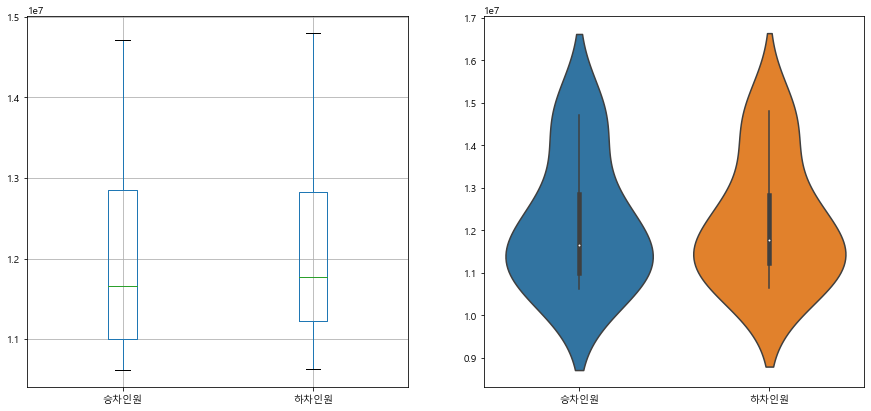

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(221)
cd.boxplot()

plt.subplot(222)
sns.violinplot(data=cd)

In [23]:
acd=cd.sort_values(by='승차인원',ascending=False).reset_index()
acd

,index,지하철 역,승차인원,하차인원
0,1,강남,14714780,14401101
1,8,잠실(송파구청),14621564,14797772
2,2,고속터미널,13057145,13043113
3,5,서울역,12254047,12057907
4,9,홍대입구,11796291,12179711
5,7,신림,11525611,11211329
6,6,선릉,11447630,11489561
7,4,사당,10849042,10790137
8,0,가산디지털단지,10772651,11256540
9,3,구로디지털단지,10615273,10633966


In [24]:
bunmo=acd['승차인원'].sum()

In [25]:
ratio1=acd['승차인원']/bunmo
ratio1

0    0.120956
1    0.120190
2    0.107330
3    0.100729
4    0.096966
5    0.094741
6    0.094100
7    0.089179
8    0.088552
9    0.087258
Name: 승차인원, dtype: float64

In [26]:
ratio2=acd['하차인원']/bunmo
ratio2

0    0.118378
1    0.121638
2    0.107215
3    0.099116
4    0.100118
5    0.092157
6    0.094445
7    0.088695
8    0.092529
9    0.087412
Name: 하차인원, dtype: float64

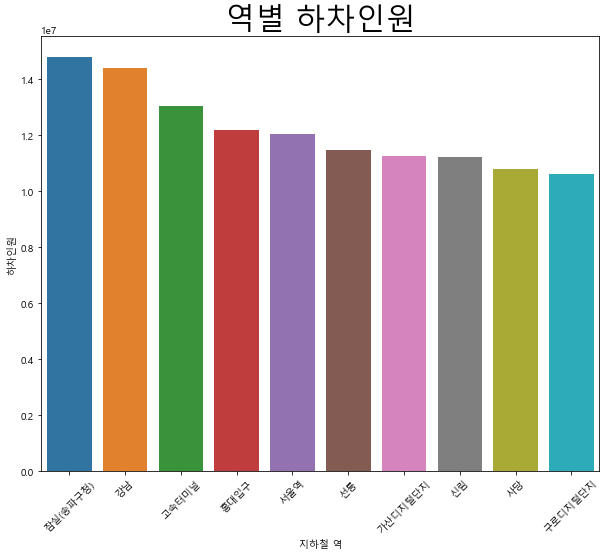

In [27]:
_=plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
_=plt.title('역별 하차인원',fontsize=30)
_=sns.barplot(data=cd.head(10), x='지하철 역', y='하차인원')

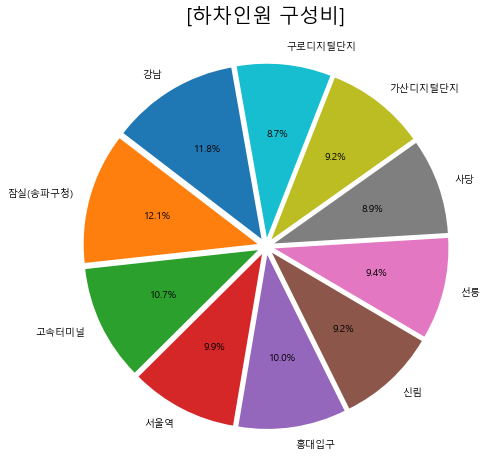

In [28]:
labels=acd['지하철 역']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(8,8))
plt.pie(ratio2, labels=labels, autopct='%.1f%%',shadow=False, startangle=100,explode=explode)
plt.title('[하차인원 구성비]',fontsize=20)

plt.show()

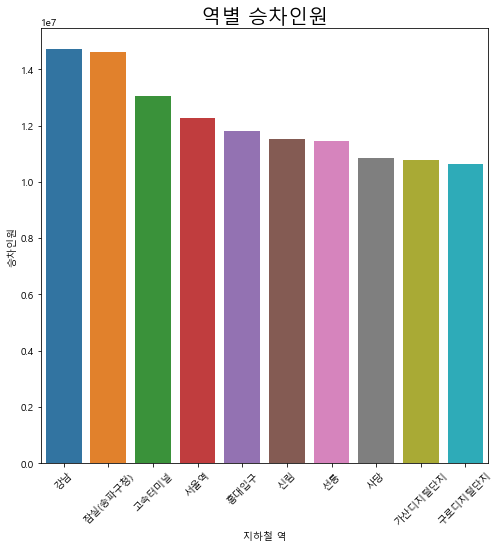

In [29]:
_=plt.figure(figsize=(8,8))
_=plt.title('역별 승차인원',fontsize=20)
plt.rc('xtick', labelsize=13)  # x축 눈금 폰트 크기
plt.xticks(rotation=45)
_=sns.barplot(data=acd, x='지하철 역', y='승차인원')

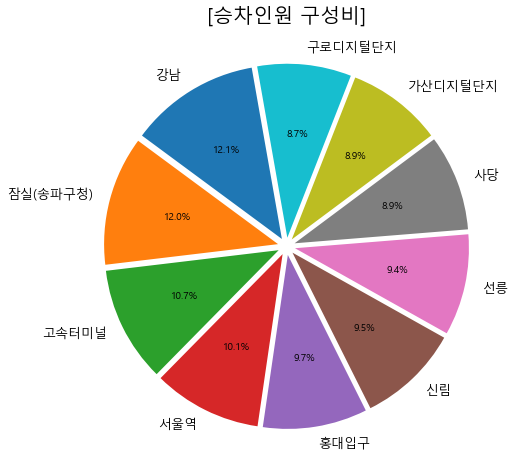

In [30]:
labels=acd['지하철 역']
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(8,8))
plt.pie(ratio1, labels=labels, autopct='%.1f%%',shadow=False, startangle=100,explode=explode)
plt.title('[승차인원 구성비]',fontsize=20)

plt.show()

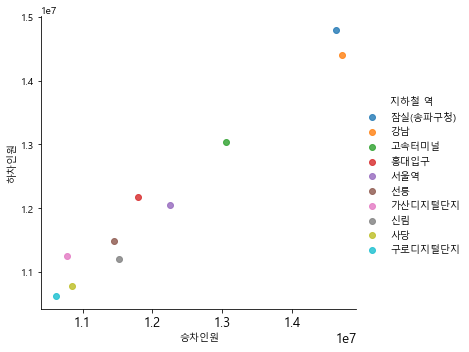

In [31]:
sns.lmplot(x='승차인원',y='하차인원',data=cd,hue='지하철 역',line_kws={"color":'brown','alpha':0.6,"lw":2})
plt.show()

<AxesSubplot:xlabel='승차인원', ylabel='하차인원'>

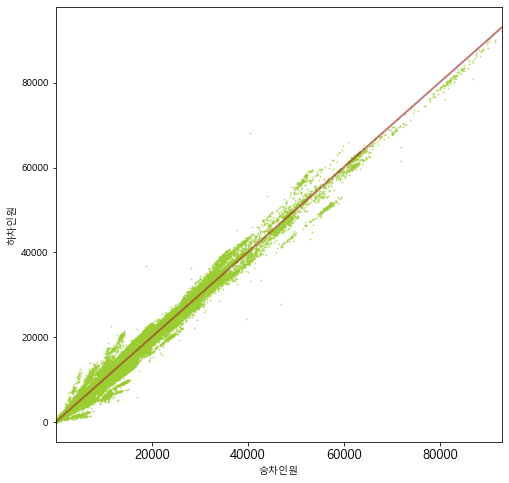

In [32]:
plt.figure(figsize=(8,8))
sns.regplot(x=raw['승차인원'],y=raw['하차인원'],scatter_kws={"color":'yellowgreen','alpha':0.5,'s':1},line_kws={"color":'brown','alpha':0.6,"lw":2})


승차인원은 __강남> 잠실 > 송파 > 고속터미널 > 서울역 > 홍대입구__ 순으로   
하차인원은 __잠실> 강남 > 고속터미널 > 홍대입구 > 서울역__ 순으로 많았습니다.  
boxplot과 violineplot을 통해 하차인원과 승차인원간의 이상치는 없었으며 비슷한 분포 형태를 나타내고 있었습니다.   
regplot과 lmplot을 이용하여 521개의 역과 1000만명 이상의 역 10곳에 대한 승하차인원의 상관관계를 각가 시각화해본 결과, 승차인원과 하차인원은 양의 상관관계를 가지고 있었습니다 즉, 하차인원이 많은 역이 승차인원도 많음을 알 수 있었습니다. 


<p/>  
<br/>  
<br/>  

#### 노선별로 요일별 승객수 시각화

노선 중 1호선~9호선의 요일별 승하차 인원의 차이가 있는지 시각화를 해보았습니다. 히트맵에 나타내기에는 인원의 수가 너무 크므로 10000을 나누어 숫자의 크기를 줄였습니다. 

In [33]:
# 하나의 노선(1호선) 데이터를 선택하여 역별/요일별 승객수 데이터를 정리 

line = '1호선'
data_line = raw[raw['호선'] == line]

df_pivot = data_line.pivot_table(index = ['지하철 역'], columns = '요일', values = '승차인원',aggfunc = 'sum')

df_pivot = df_pivot[['월','화','수','목','금','토','일']]  
df_pivot = df_pivot / 10000
df_pivot

요일,월,화,수,목,금,토,일
지하철 역,,,,,,,
동대문,31.4561,32.4553,32.3945,31.6636,33.0120,30.0356,24.9547
동묘앞,21.7571,23.3183,24.4260,22.8873,23.9363,30.0737,33.5747
서울역,117.6183,118.7476,115.5853,118.3005,128.5975,75.4949,66.5404
시청,59.5938,63.5072,61.0700,61.7205,61.4611,25.5447,18.3210
신설동,40.0746,41.0167,40.3634,40.4012,41.1854,25.5334,19.4196
제기동,49.8084,50.9943,50.2879,48.9802,49.9623,41.7555,26.5303
종각,97.6026,101.8393,99.3577,99.3753,99.6938,47.8513,31.8496
종로3가,69.4101,71.3513,71.9202,70.3014,73.5373,57.6530,36.8196
종로5가,63.4305,66.3889,64.5646,64.3421,65.0848,48.7348,22.9242


In [34]:
data_week = pd.pivot_table(data = raw, index = '요일', values = '승차인원', aggfunc='sum').sort_values(by='승차인원',ascending=False)

data_week

,승차인원
요일,
금,198507797
화,196190399
목,192645303
수,192190719
월,189123712
토,131120653
일,94924257


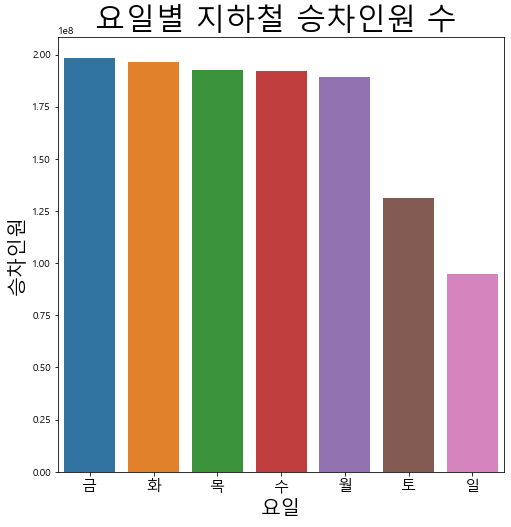

In [35]:
_=plt.figure(figsize=(8,8))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
_=sns.barplot(data=data_week, x=data_week.index, y='승차인원')
_=plt.title('요일별 지하철 승차인원 수 ',fontsize = 30)


In [36]:
data_week1 = pd.pivot_table(data = raw, index = '요일', values = '하차인원', aggfunc='sum').sort_values(by='하차인원',ascending=False)

data_week1

,하차인원
요일,
금,197876930
화,195591083
목,192044205
수,191575961
월,188550215
토,130524833
일,94411547


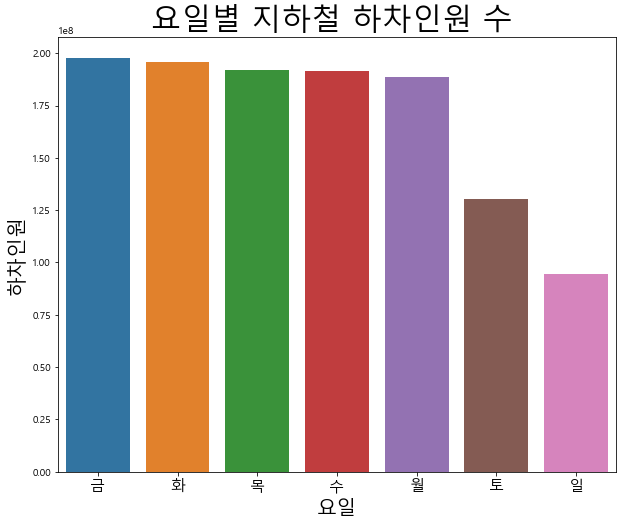

In [37]:
_=plt.figure(figsize=(10,8))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
_=sns.barplot(data=data_week1, x=data_week.index, y='하차인원')
_=plt.title('요일별 지하철 하차인원 수 ',fontsize = 30)


In [38]:
data_week2=data_week.join(data_week1)
data_week2

,승차인원,하차인원
요일,,
금,198507797,197876930
화,196190399,195591083
목,192645303,192044205
수,192190719,191575961
월,189123712,188550215
토,131120653,130524833
일,94924257,94411547


<AxesSubplot:xlabel='요일'>

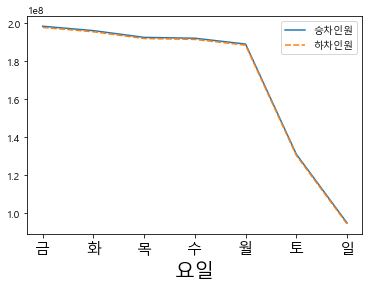

In [39]:
sns.lineplot(data=data_week2)

앞에서 살펴본 바와 같이 승차인원과 하차인원은 거의 비슷하게 집중되는 것을 확인 할 수 있었습니다.( 승차인원이 하차인원보다 좀 많습니다.)    
승하차인원은 __금요일>화요일>목요일>수요일>월요일>토요일>일요일__ 순으로 많았습니다.

### 1호선-9호선의 승하차 인원 시각화
 서울시 지하철 1호선-9호선을 중 승하차 인원이 어느 호선에 집중이 되는지를 알아보고자 하였습니다.

In [40]:
# 1호선 ~ 9호선 노선 리스트를 정리
line_seoul_list = [ ]
for line in raw['호선'].unique():
    if line[1:] == '호선':    # x호선 인 경우를 선택. 
        line_seoul_list.append(line)
line_seoul_list    

['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선']

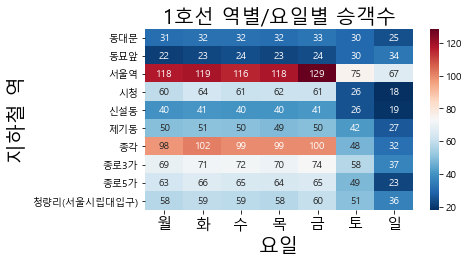

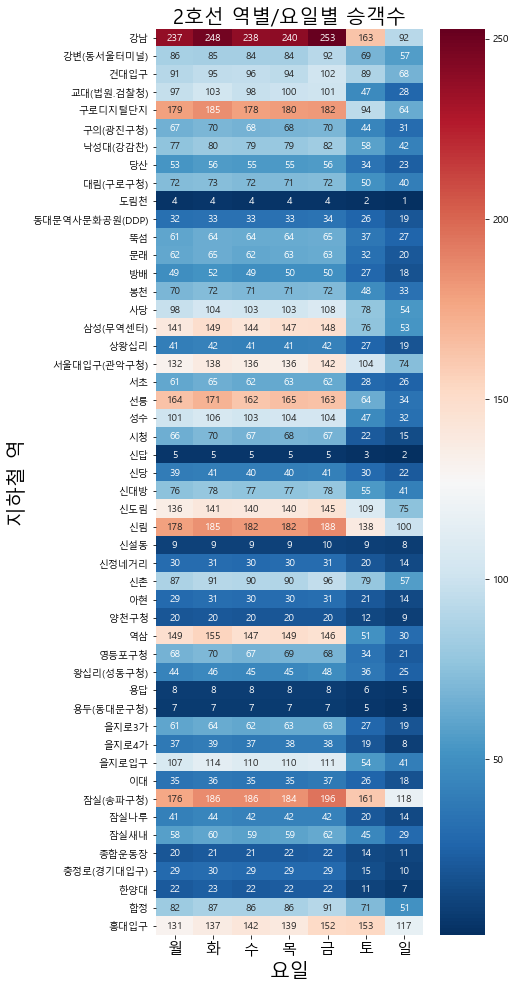

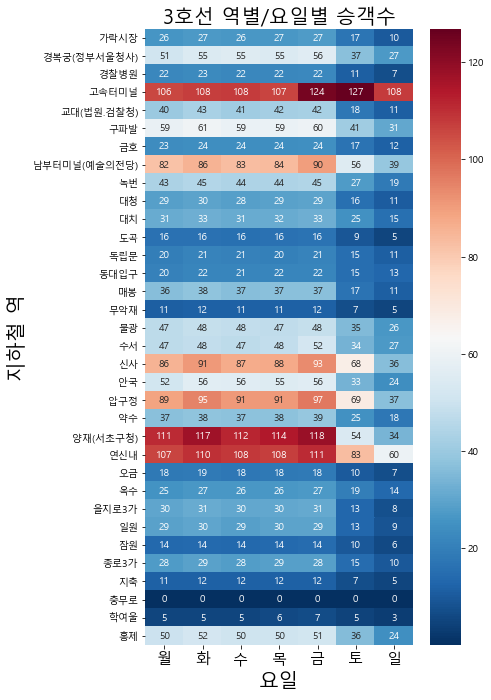

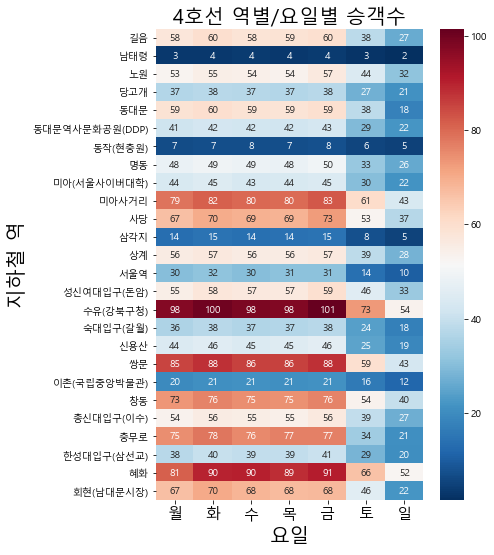

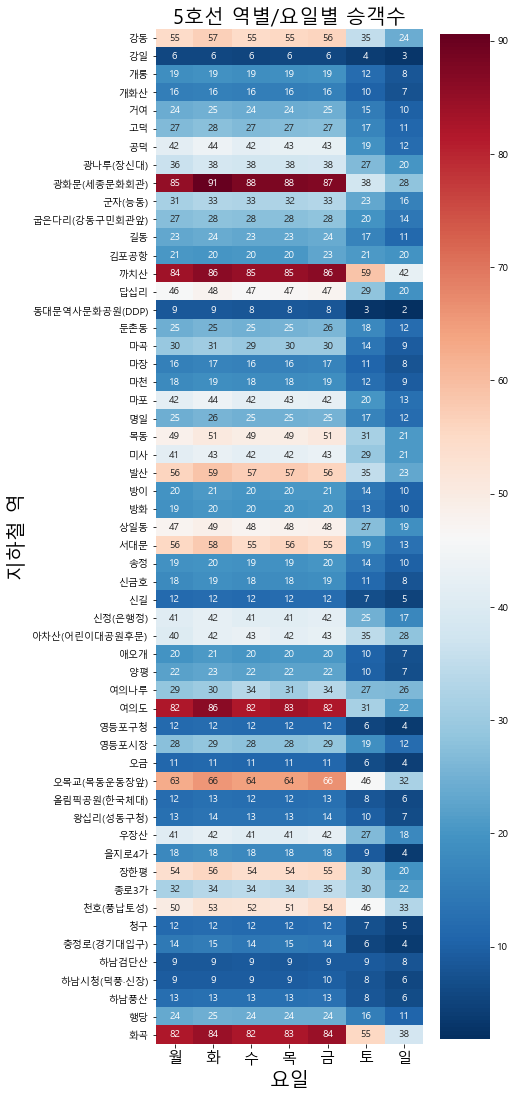

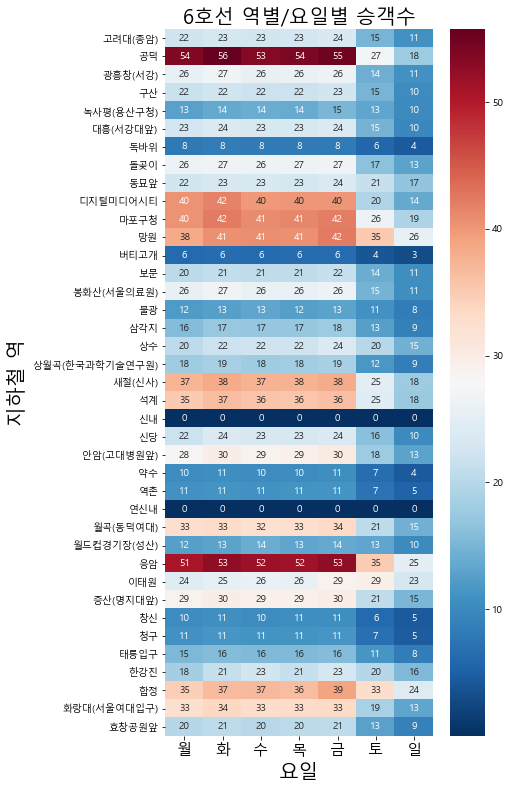

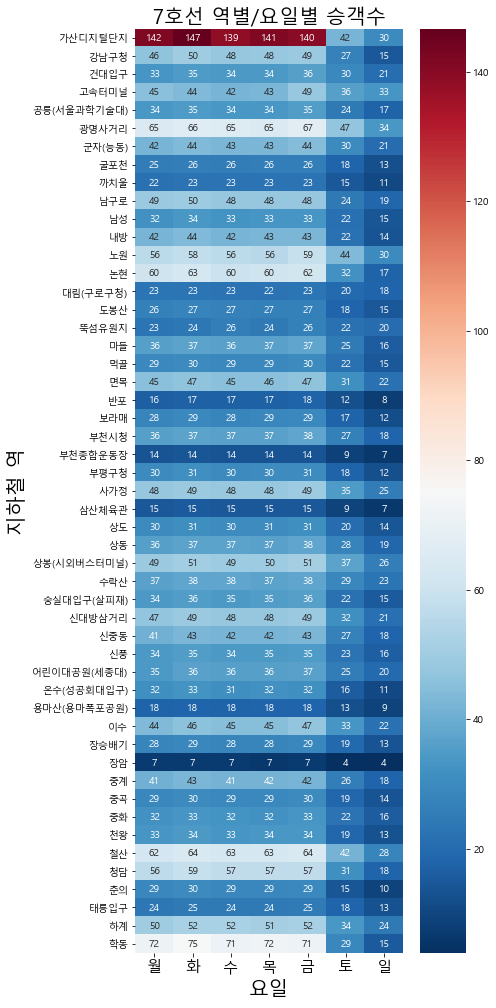

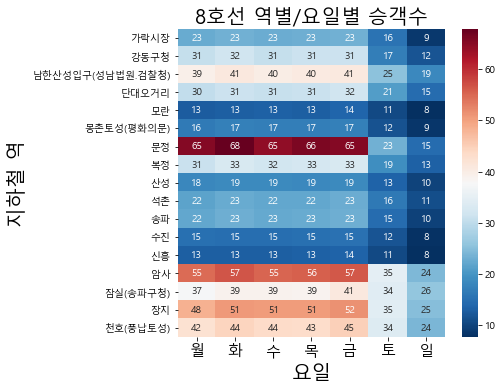

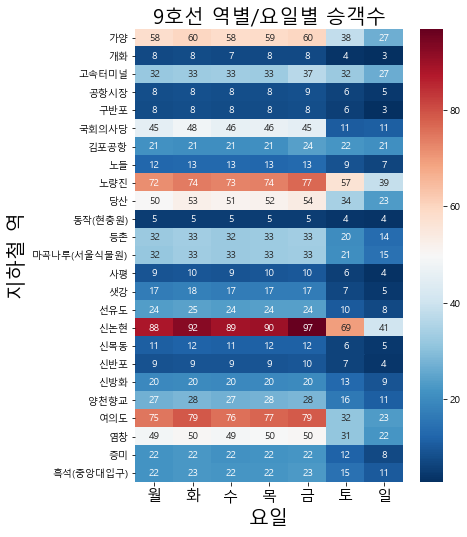

In [41]:
# 1~9호선의 노선별 승객수 데이터를 정리

for line in line_seoul_list:
    
    # 데이터 정리하기
    data_line = raw[raw['호선'] == line]
    df_pivot = data_line.pivot_table(index = ['지하철 역'], columns = '요일', values = '승차인원',aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot / 10000  # 만명단위로 수정
    
    # 그래프 그리기
    fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   
                                            # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현. 
    plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # for title
    sns.heatmap(df_pivot, cmap = "RdBu_r", 
               annot = True, fmt = '.0f')

히트맵을 통하여 알아본 결과  __2호선,7호선, 3호선, 1호선, 4호선__에 __100만명 이상__의 인원들이 집중되고  4개의 호선 모두 __금요일__에 승차인원이 집중된다. 

### 시간대별 지하철 승하차 인원 시각화
 대체적으로 지하철의 이용객은 어느 시간대에 집중되는지를 알아보기 위해 1시간 단위로 나누어 시각화를 해보았습니다.

In [42]:
c=timeraw.filter(regex='하차')

In [43]:
d=timeraw.filter(regex='승차')

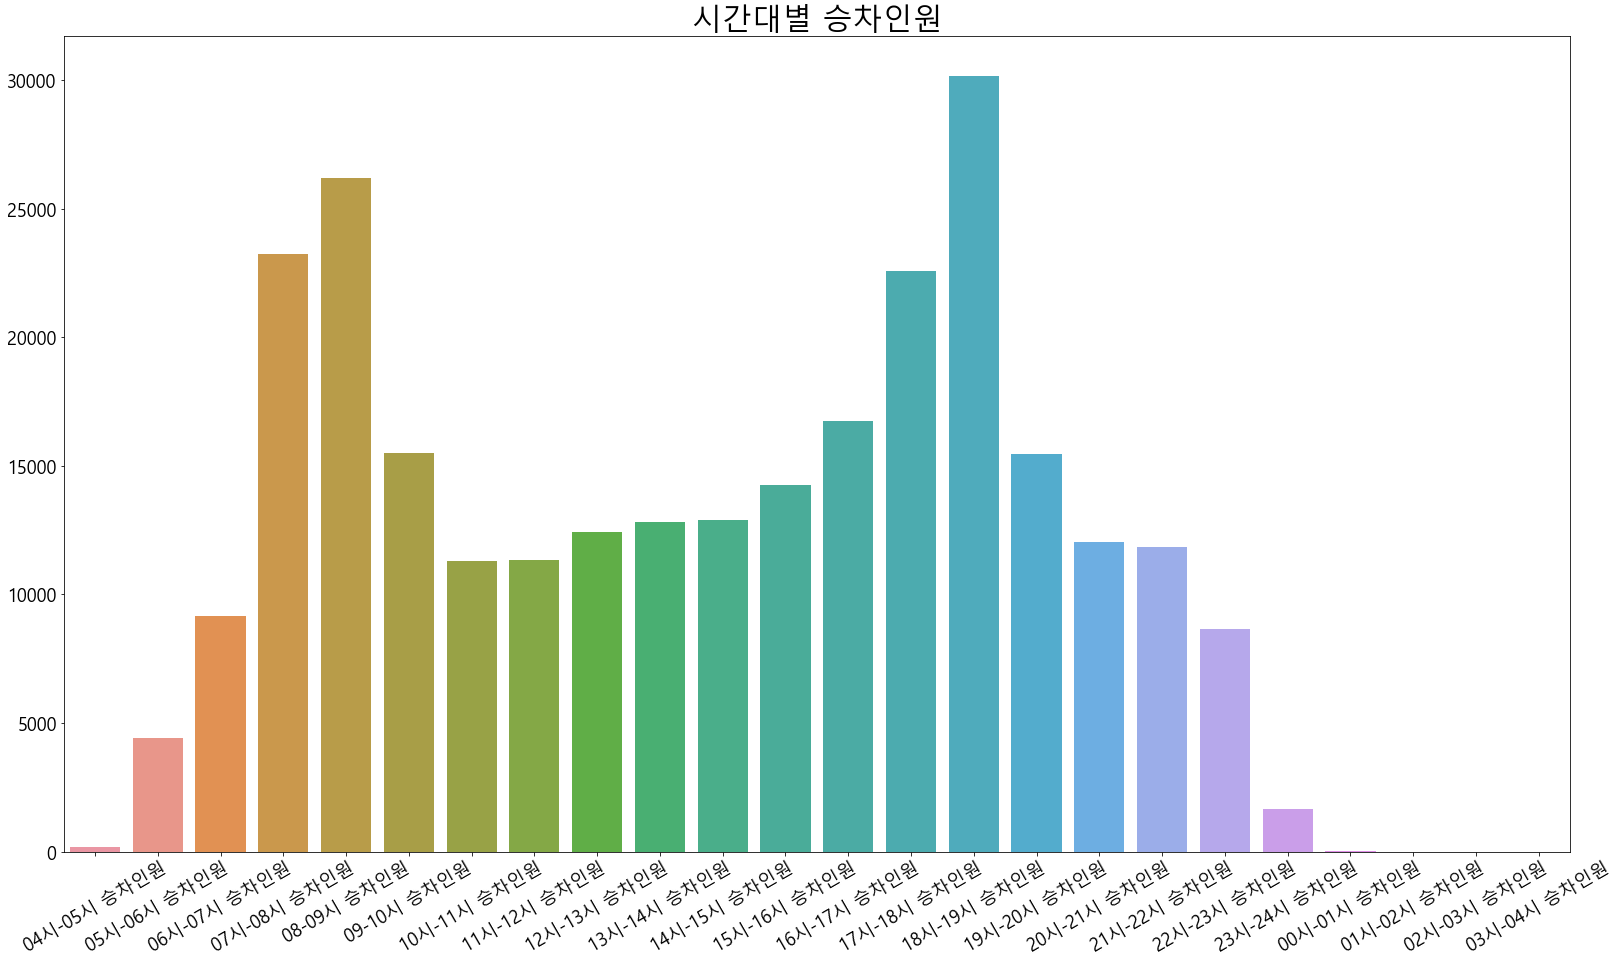

In [44]:
#시간대별 승차 인원
plt.figure(figsize=(27,15))
a=sns.barplot(data=d,ci=False)
_=plt.xticks(rotation=30,fontsize=18)
_=plt.yticks(fontsize=18)
_=plt.title('시간대별 승차인원',fontsize = 30)

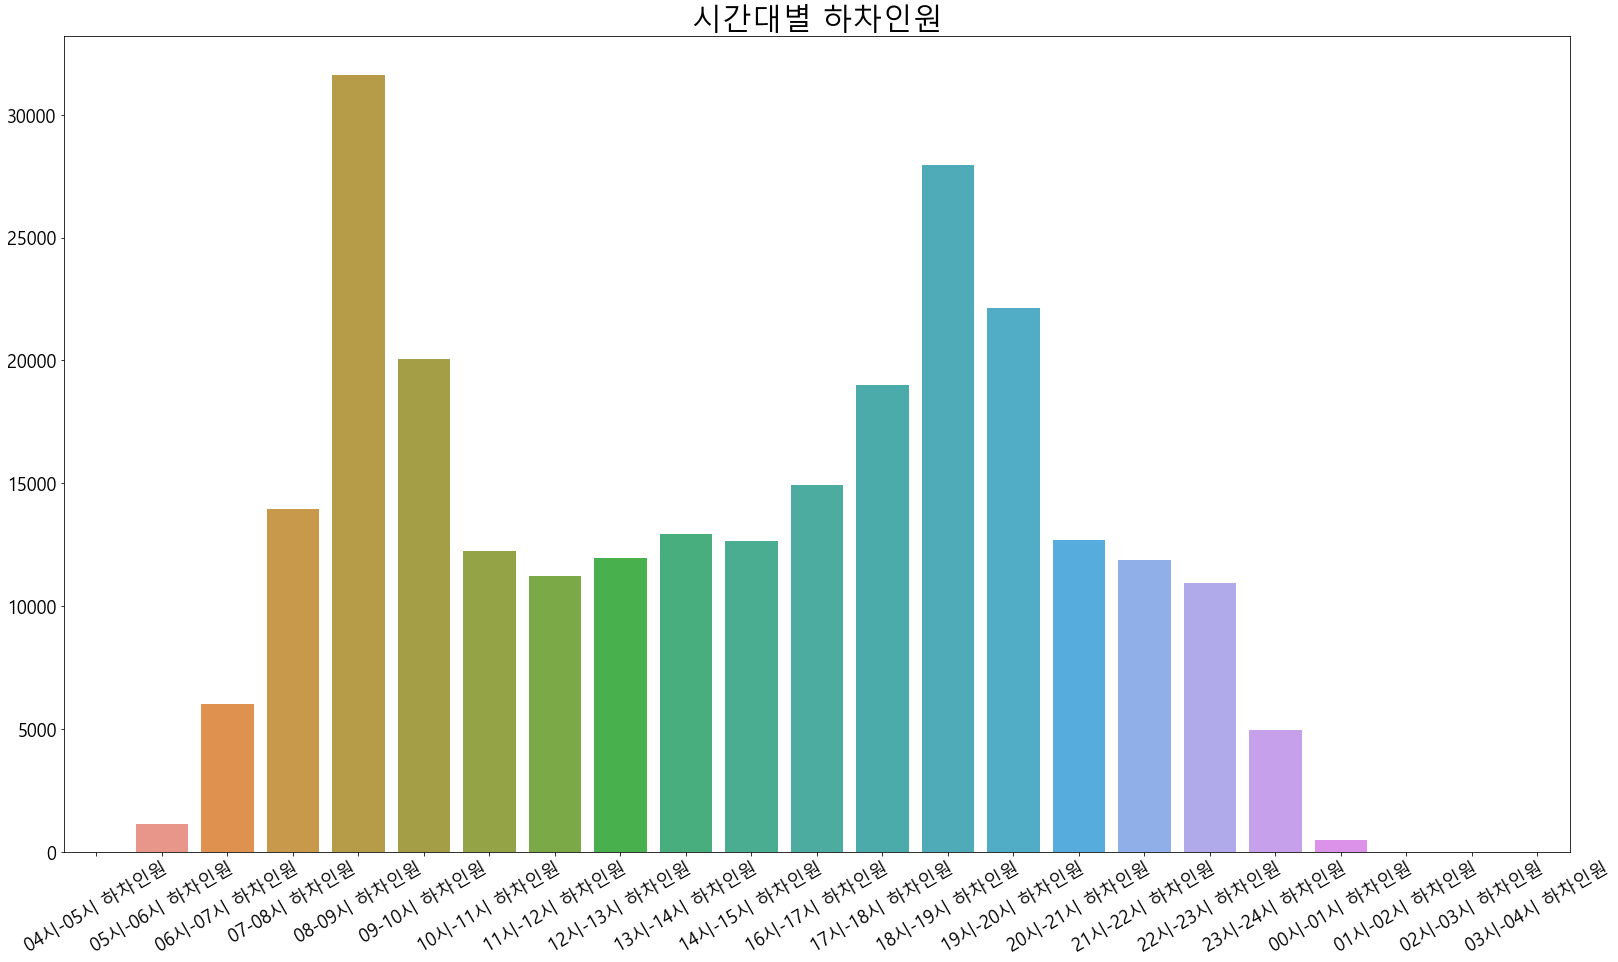

In [45]:
#시간대별 하차 인원
plt.figure(figsize=(27,15))
a=sns.barplot(data=c,ci=False)
_=plt.xticks(rotation=30,fontsize=18)
_=plt.yticks(fontsize=18)
_=plt.title('시간대별 하차인원',fontsize = 30)

In [46]:
timeraw['07시-08시 승차인원']

0       27116
1        4457
2        4971
3        4413
4        3297
        ...  
4241      836
4242     5455
4243      700
4244     3006
4245      371
Name: 07시-08시 승차인원, Length: 4246, dtype: int64

승차 인원과 하차 인원 모두 08시-09시 18시-19시에 집중되는 것을 알 수 있었습니다.

### 버스 노선별 시각화

In [47]:
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20210101,100,100번(하계동~용산구청),11428,한성여객종점,12,0,20210104
1,20210101,100,100번(하계동~용산구청),11374,서울시립북서울미술관,8,0,20210104
2,20210101,100,100번(하계동~용산구청),11380,목련아파트상가,86,14,20210104
3,20210101,100,100번(하계동~용산구청),11339,월계헬스케어센터,112,44,20210104
4,20210101,100,100번(하계동~용산구청),1002,창경궁.서울대학교병원,21,23,20210104
...,...,...,...,...,...,...,...,...
7340020,20210728,7734,7734번(진관공영차고지~홍대입구역),13194,명지대,89,170,20210731
7340021,20210728,7734,7734번(진관공영차고지~홍대입구역),12268,시립은평병원,323,155,20210731
7340022,20210728,7734,7734번(진관공영차고지~홍대입구역),12473,응암초교.백련산힐스테이트3차,122,92,20210731
7340023,20210728,7734,7734번(진관공영차고지~홍대입구역),13196,명지대삼거리,115,128,20210731


In [48]:
indx_nm1=bus_station[bus_station['역명'].str.contains('국회의사당')].index
bus_station_a = bus_station.drop(indx_nm1)

['잠실(송파구청)',
 '강남',
 '고속터미널',
 '홍대입구',
 '서울역',
 '선릉',
 '가산디지털단지',
 '신림',
 '사당',
 '구로디지털단지']

In [49]:
#합치면 이부분은 삭제해도 됨
list_df1 = ['잠실역','강남역','고속터미널','홍대입구','서울역','선릉역','가산디지털단지','신림역','사당역','구로디지털단지']

In [50]:
bus = pd.DataFrame()
for i in list_df1:
     z =bus_station_a[bus_station_a['역명'].str.contains(i)]
     z['역명']=i
     bus = bus.append(z)
bus

<ipython-input-50-37fee5b50563>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['역명']=i


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
994,20210101,362,362번(송파공영차고지~여의도),24138,잠실역,55,125,20210104
1251,20210101,362,362번(송파공영차고지~여의도),24146,잠실역,140,74,20210104
1899,20210101,342,342번(강동차고지~압구정로데오역),24138,잠실역,46,48,20210104
2041,20210101,342,342번(강동차고지~압구정로데오역),24133,잠실역,102,44,20210104
2217,20210101,2311,2311번(중랑차고지~문정동),24002,잠실역,26,143,20210104
...,...,...,...,...,...,...,...,...
7333127,20210728,5620,5620번(시흥동~선유도역),21001,구로디지털단지,414,1220,20210731
7333148,20210728,5620,5620번(시흥동~선유도역),17013,구로디지털단지,707,189,20210731
7333187,20210728,5621,5621번(삼익아파트~구로공단역),17014,구로디지털단지,2561,2282,20210731
7333605,20210728,6512,6512번(구로동~서울대),17013,구로디지털단지,390,162,20210731


승하차 인원이 많은 지하철 역을 지나는 버스들을 추려내었습니다.

In [51]:
import matplotlib.cm as cm 

공항ㆍ광역ㆍ간선ㆍ지선ㆍ순환ㆍ심야ㆍ마을 버스들 중 교통카드를 사용해 버스, 지하철에서 환승 시 추가요금 없이 환승할 수 있으며, 서울특별시 및 수도권 일부 지역에서 중~장거리 노선을 운행을 하기 때문에 출퇴근 인원들이 주로 이용하게 되는 간선 버스를 분석 대상으로 선정하였습니다.  

![image-2](./버스노선설명이미지.png)

In [52]:
blank_list=[]
z=bus['노선번호'].unique()
for i in z:
    if len(i)==3:
        blank_list.append(i)
#blank_list

In [53]:
zz=pd.DataFrame()
for i in blank_list:
    zz=zz.append(bus[bus['노선번호']==i])
zz[zz['역명']=='신림역']['노선번호'].unique()

#zz는 간선 버스들만 모아놓은 데이터프레임이다

array(['643', 'N61', '506', '152', '500', '504', '651'], dtype=object)

In [54]:
zz_1=zz.drop_duplicates().sort_values(by='노선번호')
zz_2=zz_1[zz_1.duplicated(['노선번호'])==True]

In [55]:
zz_3=zz_1['노선번호'].value_counts()>1
zz_3=pd.DataFrame(zz_3)
zz_3[zz_3['노선번호']==True].index

Index(['N13', 'N61', 'N37', '360', '341', 'N26', 'N15', '643', '452', '741',
       '470', '604', 'N16', 'N62', '421', '400', '150', '402', '146', '740',
       '273', '502', '362', 'N65', '140', '540', '420', '542', '440', '441',
       '640', '506', '602', '603', '271', '463', '173', '262', '571', '261',
       '651', '145', '507', '152', '302', '401', '320', '505', '303', '500',
       '504', '01A', '652', '01B', '761', '333', '653', '342', '472', '162',
       '721', '143', '100', '160', '701', '144', '301', '720', '103', '151',
       '142', '501', '260', '270', '148', '503', '704', '370', 'N30', '350',
       '708', '601', '104', '101', '202', '752', '605', '406', '705', '340',
       '600', '201', '541', '742', '751'],
      dtype='object')

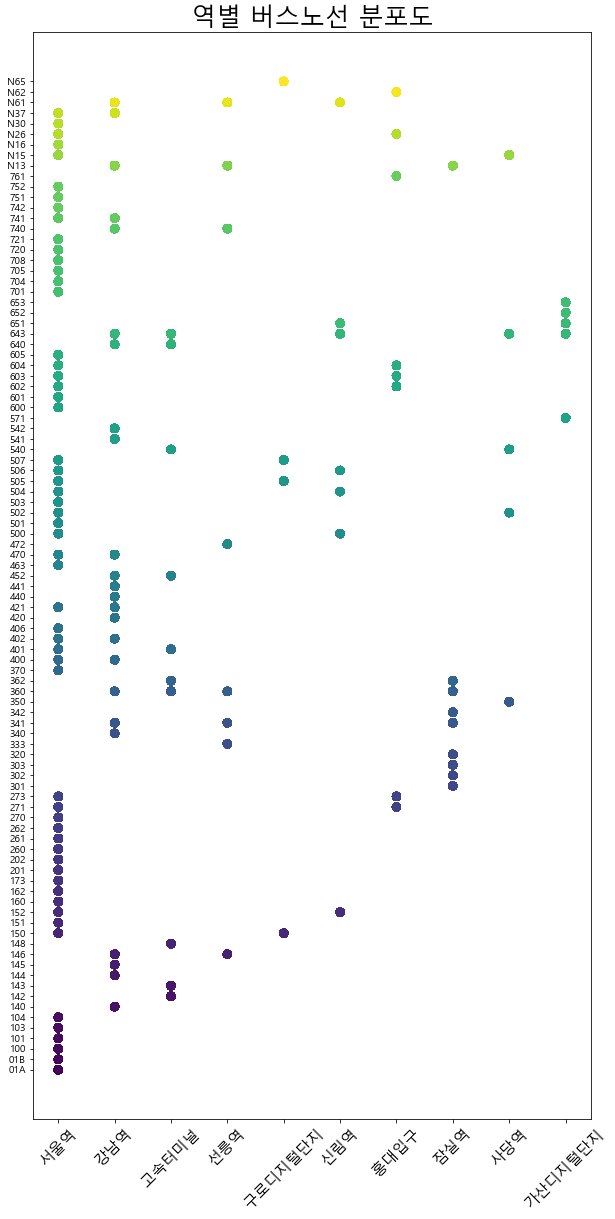

In [56]:
_=plt.figure(figsize=(10,20))
x=zz_1['역명']
y=zz_1['노선번호']
plt.xticks(rotation=45)
c= np.linspace(1,138,y.shape[0])
plt.scatter(x=x,y=y,s=8*8,c=c)
_=plt.title('역별 버스노선 분포도',size=25)

'643', '360', 'N61', '341', 'N13', '452', '602', '504', '651', '640',
       '604', '603', '362', '401', '400', '271', '402', '421', '540', '470',
       '507', '500', '506', '502', '273', '505', '740', '152', '146', 'N37',
       'N26', '150', 'N15', '741'   
 간선들 중 승하차 인원이 많은 역을 중복하여 지나가는 버스들을 알아냈고 사용자가 많은 역을 지나는 버스가 추가 배치가 된다면 사용 인원이 분산 되는데 도움이 될 수 있을 것입니다.  
 
분포도를 보면 알수 있듯이 서울역과 강남역을 지나는 간선 버스들은 많은 방면 다른 인구 집중 지하철 역들에는 상대적으로 적은 것을 알 수 있었습니다.

## 지도로 시각화

In [57]:
sslist=['잠실','서울','강남','고속터미널','선릉','구로디지털단지','신림','홍대입구','사당','가산디지털단지']

In [58]:
sub_site[sub_site['지하철 역']=='잠실']

,지하철 역,위도,경도
57,잠실,37.51395,127.102234


In [59]:
sub_site_df=pd.DataFrame()
for i in sslist:
    ss=sub_site[sub_site['지하철 역']==i]
    sub_site_df= sub_site_df.append(ss)
sub_site_df

,지하철 역,위도,경도
57,잠실,37.513950,127.102234
6,서울,37.554648,126.972559
65,강남,37.497175,127.027926
51,고속터미널,37.504810,127.004943
69,선릉,37.504503,127.049008
141,구로디지털단지,37.485266,126.901401
139,신림,37.484201,126.929715
16,홍대입구,37.557192,126.925381
47,사당,37.476530,126.981685
54,가산디지털단지,37.481072,126.882343


In [60]:
bus_site = bus_site.sort_values(by='정류소명')
bus_site[bus_site['정류소명'].str.contains('잠실역')]

,정류소번호,정류소명,X좌표,Y좌표
10528,24998,잠실역,127.098880,37.514949
10149,24137,잠실역,127.098970,37.514470
10145,24133,잠실역,127.099210,37.514499
10150,24138,잠실역.롯데월드,127.097975,37.512839
10158,24146,잠실역.롯데월드,127.098090,37.512636
10111,24017,잠실역.롯데월드몰,127.100721,37.512521
10096,24002,잠실역.잠실대교.남단,127.099556,37.513668
10095,24001,잠실역.잠실대교.남단,127.098450,37.515539
10146,24134,잠실역1번.11번출구,127.103131,37.514185
10144,24132,잠실역8번출구,127.101521,37.513798


In [61]:
blist=[]
blist=bus['역명'].unique()
blist

array(['잠실역', '강남역', '고속터미널', '홍대입구', '서울역', '선릉역', '가산디지털단지', '신림역',
       '사당역', '구로디지털단지'], dtype=object)

In [62]:
bus_site_df = pd.DataFrame()
for i in blist:
    bb=bus_site[bus_site['정류소명'].str.contains(i)]
    bus_site_df=bus_site_df.append(bb)
bus_site_df = bus_site_df.reset_index()
bus_site_df=bus_site_df.drop(index=[98,99])
bus_site_df=bus_site_df.reset_index()

In [63]:
# 지도에 표시할 데이터 준비
for i in range(len(bus_site_df)): 
 # data의 행만큼 반복을 하려면 range(len(data)): 를 한다.
    lat = bus_site_df.loc[i,'X좌표']    #loc['행 번호','열 이름']
    long = bus_site_df.loc[i,'Y좌표']
    name = bus_site_df.loc[i,'정류소명']

### 버스 정류장 시각화  


In [64]:
import folium
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster

In [65]:
bs= folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 15)

In [66]:
bs= folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 15)
marker_cluster = MarkerCluster().add_to(bs)
for i in range(len(bus_site_df)): 
    long = bus_site_df.loc[i,'X좌표']    #loc['행 번호','열 이름']
    lat = bus_site_df.loc[i,'Y좌표']
    name = bus_site_df.loc[i,'정류소명']
    name1=bus_site_df.loc[i,'정류소번호']
    folium.Marker([lat, long],tooltip=name,popup= name1).add_to(marker_cluster)
bs

### 지하철 역 지도 시각화

In [67]:
sub_site_df=sub_site_df.reset_index()

In [68]:
sub_site_df.loc[0,'위도']

37.51395

In [69]:
subs= folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 12)
subs
for i in range(len(sub_site_df)): 
 # data의 행만큼 반복을 하려면 range(len(data)): 를 한다.
    lat = sub_site_df.loc[i,'위도']    #loc['행 번호','열 이름']
    long = sub_site_df.loc[i,'경도']
    name = sub_site_df.loc[i,'지하철 역']
    folium.Marker([lat, long],tooltip=name+'역',color='yellow',icon=folium.Icon(color='green')).add_to(subs)
    folium.CircleMarker([lat, long],tooltip=name+'역',color='yellow').add_to(subs)
subs

한강 이남쪽 1~2호선에 이용자가 많은 역들이 분포해 있음을 한눈에 볼 수 있었습니다.

#### 지도 합치기
지하철 역 주변에 위치한 간선버스 정류장을 함께 볼 수 있도록 표시하여 보았습니다.

In [70]:
bs= folium.Map(location = ['37.5536067','126.9674308'], zoom_start = 15)
marker_cluster = MarkerCluster().add_to(bs)
minimap = MiniMap() 
minimap.add_to(bs)
for i in range(len(bus_site_df)): 
    long = bus_site_df.loc[i,'X좌표']    #loc['행 번호','열 이름']
    lat = bus_site_df.loc[i,'Y좌표']
    name = bus_site_df.loc[i,'정류소명']
    name1=bus_site_df.loc[i,'정류소번호']
    folium.Marker([lat, long],tooltip=name,popup= name1).add_to(marker_cluster)
   
for i in range(len(sub_site_df)): 
 # data의 행만큼 반복을 하려면 range(len(data)): 를 한다.
    lat = sub_site_df.loc[i,'위도']    #loc['행 번호','열 이름']
    long = sub_site_df.loc[i,'경도']
    name = sub_site_df.loc[i,'지하철 역']
    folium.Marker([lat, long],tooltip=name+'역',icon=folium.Icon(color='green')).add_to(bs)
    folium.CircleMarker([lat, long],tooltip=name+'역',color='yellow').add_to(bs)
bs

## 결론 
1. 서울시 지하철 521개의 역중 이용 인원이 1000만명 이상인 10개 역을 선정하여 분석을 진행하였다.
2.  금요일 08시-09시, 18시-19시에 잠실, 강남, 고속터미널, 홍대입구, 서울역, 선릉, 가산디지털단지, 신림, 사당, 구로디지털단지 근처에 있는 버스 정류장에 간선 버스들을 추가로 배차를 하게 된다면 승차 인원을 분산 시킬 수 있을 것이고 상대적으로 사용자들이 급감하는 주말에는 배차를 조절하여 융통성 있는 인력관리가 가능할 것이다. 
3. 출퇴근시간인 08-09시 18-19시에 지하철 사용 인원이 집중된다.  
4. 승차인원과 하차인원은 상관관계 그래프 시각화 결과 양의 상과관계를 가지고 있다. 즉 승차인원이 많은 만큼 하차인원도 그만큼 증가하게 된다. 
5. 1-9호선 중 2호선, 7호선, 3호선, 1호선, 4호선을 이용하는 승객이 많다는 것을 알 수 있었다.(10대 지하철 역이 모두 이 호선들에 포함되어 있다.) 2호선,7호선, 3호선, 1호선, 4호선를 우선순위로 금요일 출퇴근 시간에 지하철 추가 배차를 넣는다면 사용인원 체증을 감소 시키는 데 도움이 될 것이다.
6. 지하철의 대부분 이용객이 출퇴근을 목적으로 하는 자들이다, 즉 버스의 간선 지선 광역 순환 노선들중 출퇴근자들이 자주 이용하고 출퇴근자들의 동선과 겹치는 간선노선을 분석 대상으로 선정하는 것이 타당하다.  

7. 10개의 인구 집중 지하철 역중 간선노선의 배차가 적은 역이 존재함을 알 수 있었다.

## 제안

### 1. 버스 추가 배차는 간선버스를 대상으로 가산디지털단지, 구로디지털단지, 사당역 순으로..  
  많은 버스 노선들 중 간선을 선택한 이유는 승객들의 다양한 목적지를 충당하기 위해서입니다. 버스가 많이 그리고 자주 온다고 한들 가고자 하는 목적지를 가지 않는다면 무용지물입니다. 따라서 버스들 중 많은 정거장을 거치는 간선 버스를 선택한다면 다양한 목적지를 지나 가능성이 높아질 것이라고 생각했기 때문에 간선버스를 추가배차의 대상으로 선정하였습니다. 가산디지털단지, 구로디지털단지, 사당역은 승하차 인원이 집중되는 역임에도 불구하고 간선버스의 배차가 적었습니다. 추가배차를 할 때 간선버스 배차가 적은 이 3개의 역을 우선순위로 07-08시 17-18시, 금요일에 추가배차를 한다면 지하철 인구 집중 완화에 기여 할 수 있을 것입니다. <p/>

### 2. 지하철 추가 배차를 고려한다면 2호선, 7호선, 3호선, 1호선, 4호선으로...
  9개의 호선 중 2호선, 7호선, 3호선, 1호선, 4호선에 인원들이 집중되는 것을 HeatMap을 통해 알 수 있었습니다.  
  특히 2호선에는 인구가 많은 10개의 역 중 7개의 역이 위치해 있습니다. (홍대입구, 사당, 구로디지털단지, 신림, 선릉, 잠실, 강남) 1호선은 호선에 포함된 역 대비 승객수가 가장 높았던 곳입니다.이곳들을 우선순위로 추가배차를 한다면 보다 효율적인 인구 분산이 이루어질 것으로 보입니다.  <p/>

### 3. 지하철로 몰리는 인구를 왜 분산하려고 하는가? 
![image-2](./거리두기이미지.png)

  현재 코로나 19로 사회적 거리두기의 중요성이 부각되고 있는 상황입니다. 특히 지하철은 불특정 다수의 사람이 밀집하여 이용하기 때문에 코로나 전파에 더욱 신경을 써야하는 대상입니다. 모든 구간 모든 시간대에 배차를 충분히 배치하여 탑승자들이 정체되어 한곳에 밀집되는 것을 예방하는 것이 최고의 방법이겠지만 운송수단사 측의 인력적, 자워적 문제로 그것은 불가능한 일입니다. 한정된 인원과 자원을 최대한 활용을 하여 최상의 결과를 내는 것이 이번 데이터 분석의 목표였습니다. 사용인원이 많은 노선, 역을 파악하고 하루 중 인원이 집중되는 시간대, 일주일 중 인원이 집중되는 요일에 추가배차를 하거나 버스와 같은 기타 교통수단으로의 사용 인원 분담을 유도한다면 필요 최소한의 투입으로 사회적 거리두기의 실효성을 증진 시키는 것에 이바지 할 것입니다.  

 '본 저장물의 저작권은 Apache License v2.0을 따릅니다